# Question 1

Find sum of squared error

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
import random
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
#data_folds gathers all of the data from the seperate files for concatination
data_folds = []

#Each data and label file is combined into one dataframe per fold
#The labels are added as a new column titled 'label'
#The fold is added as a new column titled 'fold'
for i in range(10):
    labels = pd.read_csv("regression-dataset/fLabels"+str((i+1))+".csv", names=['label'])
    data_folds.append(pd.read_csv("regression-dataset/fData"+str((i+1))+".csv", header=None))
    data_folds[i] = data_folds[i].join(labels)
    data_folds[i]['fold']=i+1

#The individual data_folds dataframes are combined into one called 'data'
data = pd.concat(data_folds, ignore_index = True)

data

,0,1,label,fold
0,1.0,15.0,27.113253,1
1,11.0,3.0,8.133837,1
2,10.0,4.0,6.577702,1
3,5.0,14.0,27.055365,1
4,16.0,1.0,7.235514,1
5,2.0,5.0,5.997295,1
6,10.0,3.0,5.010387,1
7,9.0,1.0,1.970192,1
8,12.0,2.0,6.224846,1
9,6.0,16.0,29.147972,1


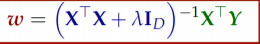

In [3]:
class lls_regression:
    """Represents a Linear Least Squares Regression classifier"""
    
    def __init__(self, p=0, bias=True):
        self.w = OrderedDict()
        self.e = OrderedDict()
        self.p = p
        self.bias = bias

    def train(self, X, Y):
        """Trains the linear model using Linear Least Squares Regression over a range of p-values
        
        X: Data matrix where columns are attributes
        Y: Labels of data asn array-like
        bias: Whether to include bias column of 1's in data
        """
        
        #initialize ordered dicts for weights and average error where key is penalty term
        self.w = OrderedDict()
        self.e = OrderedDict()
        
        #Add's a bias column if bias parameter is true
        if self.bias:
            X[X.shape[1]]=1
            
        #Works out the weights of the regressor from 0 -> p penalty terms in increments of 0.1 
        for i in np.arange(0, self.p+0.1, 0.1):
            #Round the penalty term to 1 decimal (Noticed some float rounding errors)
            i_r = round(i,1)
            
            #Compute the weights and store them in associated key of ordered dict 
            self.w[str(i_r)] = (np.linalg.pinv(X.T.dot(X)+(i_r*(np.identity(X.shape[1])))).dot(X.T.dot(Y)))
            
        return(True)

        
        
    def test_all_p(self, X, Y):
        '''Tests the error of the regressor over weights stored for all penalty terms
        
        X: Data matrix where columns are attributes
        Y: Labels of data asn array-like
        '''
        
        def predict (attributes, weights):
            '''Returns the predicted value of a point
            
            attributes: array of attributes for a single point
            weights: weights of linear model. If weights is longer than attributes then last weight is bias
            '''
            prediction = 0
            
            #Work through wights and attributes. If no attribute but weight then add it as bias
            for i in range(len(weights)):
                try:
                    prediction += (weights[i]*attributes[i])
                except:
                    prediction += weights[i]
            return prediction
        
        #Work through keys of weight dictionary and calculate average error
        for key in self.w:
            #Get predictions for each row
            predictions = X.apply(lambda row: predict(row, self.w[key]), axis=1).values
            #Calculate the euclidean distance between predictions and real values
            #store in key of penalty term
            self.e[key] = [np.linalg.norm(Y-predictions)]
        
        return(True)

In [4]:
#https://stackoverflow.com/questions/40858835/calculating-the-inverse-of-a-matrix-with-pandas

from IPython.core.interactiveshell import InteractiveShell

#InteractiveShell.ast_node_interactivity = "all"


lls_clf = lls_regression(4)
lls_clf.train(data.loc[data['fold']==1].iloc[:,0:2], data.loc[data['fold']==1]['label'])  
lls_clf.test_all_p(data.loc[data['fold']==2].iloc[:,0:2], data.loc[data['fold']==2]['label'])    
lls_clf.e


OrderedDict([('0.0', [6.3726776552017528]),
             ('0.1', [6.2794410725924656]),
             ('0.2', [6.1988227121091564]),
             ('0.3', [6.1289366485370955]),
             ('0.4', [6.0682151070488155]),
             ('0.5', [6.0153484488614852]),
             ('0.6', [5.9692377076197625]),
             ('0.7', [5.9289567804543823]),
             ('0.8', [5.8937221132268247]),
             ('0.9', [5.862868249941422]),
             ('1.0', [5.8358280041363022]),
             ('1.1', [5.812116297104585]),
             ('1.2', [5.7913169226004833]),
             ('1.3', [5.7730716600192338]),
             ('1.4', [5.7570712818136123]),
             ('1.5', [5.743048096039284]),
             ('1.6', [5.7307697385569911]),
             ('1.7', [5.7200339867996188]),
             ('1.8', [5.7106644119855128]),
             ('1.9', [5.702506722109324]),
             ('2.0', [5.695425676123901]),
             ('2.1', [5.6893024720800307]),
             ('2.2', [5.6840325298639

In [5]:
def general_10_fold(model, data, n=2):
    """Compute the accuracy of a model via 10-fold vaidation on a pandas dataframe 
    Must have fold attribute with values 1-10
    
    data: pandas dataframe with labels in a 'label' column, folds in the 'fold column and n attribute columns
    n: number of attributes (must be the first columns in dataframe)
    
    Returns pandas series of results returned by model."""
    
    #The model is trainied and tested accross 10 folds
    #The results of each folds testing are stored in the 'folds' array as pandas dataframes
    results = []
    for i in range(10):
        model.train(data.loc[data['fold']!=i+1].iloc[:,0:2], data.loc[data['fold']!=i+1]['label'])
        model.test_all_p(data.loc[data['fold']==i+1].iloc[:,0:2], data.loc[data['fold']==i+1]['label'])
        results.append(pd.DataFrame.from_dict(model.e))
    
    #Concatinate results into one dataframe
    results = pd.concat(results, ignore_index = True)
    
    def get_means(column):
        """Get the means of all columns.
        
        column: pandas series
        
        Returns the mean of the pandas series"""
        return column.mean()
    
    #Apply the get_means function column-wise and store the results (pandas series) in 'results'
    results = results.apply(get_means)
    
    #Return the pandas series containing performance results
    return results

Minimum k-value:1.6


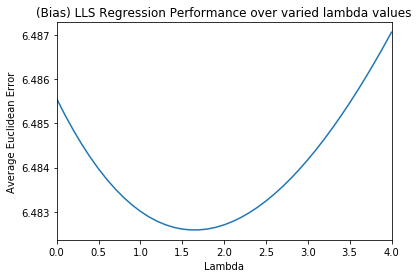

In [6]:
#Create linear least squares regressor with penalty upper bound of 4 and bias term (default)
lls_clf = lls_regression(p=4)

#Compute results over 10-fold validation
results = general_10_fold(lls_clf, data)

#Create plot
plot = results.plot.line(title='(Bias) LLS Regression Performance over varied lambda values')
plot.set_xlabel("Lambda")
plot.set_ylabel("Average Euclidean Error")

#Display plot in Jupyter
plot

#Save plot
fig = plot.get_figure()
fig.savefig("Q1_bias.pdf")

results
print("Minimum k-value:"+str(results.idxmin()))

Minimum k-value:0.0


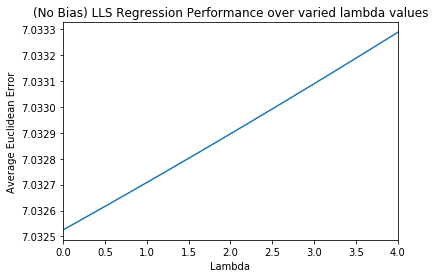

In [7]:
#Create linear least squares regressor with penalty upper bound of 4 and bias term (default)
lls_clf = lls_regression(p=4, bias=False)

#Compute results over 10-fold validation
results = general_10_fold(lls_clf, data)

#Create Plot
plot = results.plot.line(title='(No Bias) LLS Regression Performance over varied lambda values')
plot.set_xlabel("Lambda")
plot.set_ylabel("Average Euclidean Error")

#Display plot in Jupyter
plot

#Save plot
fig = plot.get_figure()
fig.savefig("Q1_no_bias.pdf")

results
#print(results)
print("Minimum k-value:"+str(results.idxmin()))
